<a id=libraries></a>
<h3 style="color:#4682B4">Import libraries and packages</h3>
<a href='#top'>🔼</a>

In [12]:
# ===================================================
# this will help in making the Python code more
# structured automatically (good coding practice)
from IPython import get_ipython

ipython = get_ipython()

if "nb_black" not in ipython.extension_manager.loaded:
    %load_ext nb_black
# ====================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# handling dates and times
import datetime

# to do mathematical computations
import math

# a library for visualizing missing data can be very helpful when trying to understand the 'shape' of missing data.
import missingno as msno

# used for regular expressions, which can be very useful when cleaning text data
import re

# scikit-learn has a number of preprocessing functions that can scaling and normalizing data or encoding categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

## Create a function to display side by side
from IPython.display import display_html


def display_side_by_side(*args):
    html_str = ""
    for df in args:
        html_str += df.to_html() + "&nbsp;&nbsp;&nbsp;"
    display_html(html_str.replace("table", 'table style="display:inline"'), raw=True)


# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<h3 style="color:#4682B4">Load the dataframes</h3>

In [13]:
# read the orders.cleaned pickle file
# read the returns.cleaned pickle file
orders_cleaned = pd.read_pickle("../data/orders_cleaned.pkl")
returns_cleaned = pd.read_pickle("../data/returns_cleaned.pkl")

# read the orders.scaled pickle file
# read the returns.scaled pickle file
orders_scaled = pd.read_pickle("../data/orders_scaled.pkl")
returns_scaled = pd.read_pickle("../data/returns_scaled.pkl")

<IPython.core.display.Javascript object>

In [14]:
orders_scaled.shape

(24059, 10)

<IPython.core.display.Javascript object>

In [15]:
returns_scaled.shape

(1208, 4)

<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  

<a id=libraries></a>
<h3 style="color:#4682B4">K-Means Clustering Elbow Algorithm</h3>
<a href='#top'>🔼</a>


Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD FOR ORDERS')

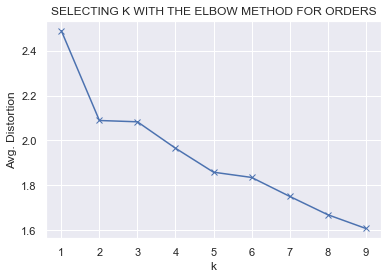

<IPython.core.display.Javascript object>

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = range(1, 10)
meanDistortions_orders = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(orders_scaled)
    prediction = model.predict(orders_scaled)
    meanDistortions_orders.append(
        sum(
            np.min(cdist(orders_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / orders_scaled.shape[0]
    )

plt.plot(clusters, meanDistortions_orders, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD FOR ORDERS")


Text(0.5, 1.0, 'SELECTING K WITH THE ELBOW METHOD FOR RETURNS')

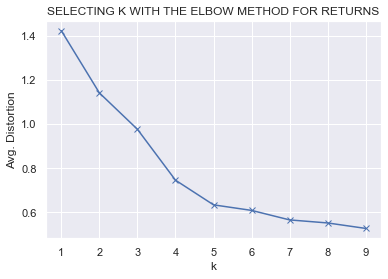

<IPython.core.display.Javascript object>

In [17]:
clusters = range(1, 10)
meanDistortions_returns = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(returns_scaled)
    prediction = model.predict(returns_scaled)
    meanDistortions_returns.append(
        sum(
            np.min(cdist(returns_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / returns_scaled.shape[0]
    )

plt.plot(clusters, meanDistortions_returns, "bx-")
plt.xlabel("k")
plt.ylabel("Avg. Distortion")
plt.title("SELECTING K WITH THE ELBOW METHOD FOR RETURNS")


<div style="border-top: 3px solid black"></div>  

<a id=kmeans></a>

<h3 style="color:blue">K-Means Clustering K=3 Model, K=4 Model, K=5 Model</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The models are trained on the scaled data because KMeans is a distance-based algorithm, and it's a good practice to use scaled data. However, the resulting cluster labels are added to the original non-scaled dataframes as well as the scaled dataframes to examine the cluster assignments in the context of both the original and the standardized data. The steps of copying, assigning, instantiating, fitting, predicting, and appending are repeated for each number of clusters (k=3, k=4, k=5) for both the orders and returns datasets.
</p>

<ol>
<li>
<b>Copy :</b>
<p>Create copies of the data frames. The data frames that are copied include:</p>
<ul>
    <li>orders_scaled</li>
    <li>orders_cleaned</li>
    <li>returns_scaled</li>
    <li>returns_cleaned</li>
</ul>
</li>

<p></p>

<li>
<b>Assign :</b>
<p>Assign the copies to their corresponding names. The names are formed by appending '_kn' to the original data frame name, where n is the number of clusters.</p>
<ul>
    <li>'orders_scaled_kn'</li>
    <li>'orders_cleaned_kn'</li>
    <li>'returns_scaled_kn'</li>
    <li>'returns_cleaned_kn'</li>
</ul>
</li>

<p></p>

<li>
<b>Instantiate :</b>
<p>Instantiate a KMeans clustering model with n clusters. The models are named by appending '_model_kn' to the corresponding data frame name.</p>
<ul>
    <li>'orders_scaled_kn_model_kn'</li>
    <li>'orders_cleaned_kn_model_kn'</li>
    <li>'returns_scaled_kn_model_kn'</li>
    <li>'returns_cleaned_kn_model_kn'</li>
</ul>
</li>

<p></p>

<li>
<b>Fit :</b>
<p>Fit the instantiated KMeans clustering model on the scaled data. The data used for fitting includes:</p>
<ul>
    <li>orders_scaled</li>
    <li>returns_scaled</li>
</ul>
</li>

<p></p>

<li>
<b>Predict :</b>
<p>Predict which group each record will be clustered into, using the corresponding model.</p>
</li>

<p></p>

<li>
<b>Append :</b>
<p>Add a new column named 'Kn_GROUP' to the corresponding data frame, which contains the cluster assignments for each record.</p>
</li>
</ol>

<a href='#top'>🔼</a>


In [23]:
# ===============================================================

orders_cleaned_k3 = orders_cleaned.copy()
orders_cleaned_k3_model_k3 = KMeans(n_clusters=3)
orders_cleaned_k3_model_k3.fit(orders_scaled)
prediction_k3 = orders_cleaned_k3_model_k3.predict(orders_scaled)
orders_cleaned_k3["K3_GROUP"] = prediction_k3

orders_cleaned_k4 = orders_cleaned.copy()
orders_cleaned_k4_model_k4 = KMeans(n_clusters=4)
orders_cleaned_k4_model_k4.fit(orders_scaled)
prediction_k4 = orders_cleaned_k4_model_k4.predict(orders_scaled)
orders_cleaned_k4["K4_GROUP"] = prediction_k4

orders_cleaned_k5 = orders_cleaned.copy()
orders_cleaned_k5_model_k5 = KMeans(n_clusters=5)
orders_cleaned_k5_model_k5.fit(orders_scaled)
prediction_k5 = orders_cleaned_k5_model_k5.predict(orders_scaled)
orders_cleaned_k5["K5_GROUP"] = prediction_k5

# ===============================================================

returns_cleaned_k3 = returns_cleaned.copy()
returns_cleaned_k3_model_k3 = KMeans(n_clusters=3)
returns_cleaned_k3_model_k3.fit(returns_scaled)
prediction_k3 = returns_cleaned_k3_model_k3.predict(returns_scaled)
returns_cleaned_k3["K3_GROUP"] = prediction_k3

returns_cleaned_k4 = returns_cleaned.copy()
returns_cleaned_k4_model_k4 = KMeans(n_clusters=4)
returns_cleaned_k4_model_k4.fit(returns_scaled)
prediction_k4 = returns_cleaned_k4_model_k4.predict(returns_scaled)
returns_cleaned_k4["K4_GROUP"] = prediction_k4

returns_cleaned_k5 = returns_cleaned.copy()
returns_cleaned_k5_model_k5 = KMeans(n_clusters=5)
returns_cleaned_k5_model_k5.fit(returns_scaled)
prediction_k5 = returns_cleaned_k5_model_k5.predict(returns_scaled)
returns_cleaned_k5["K5_GROUP"] = prediction_k5

# ===============================================================

orders_scaled_k3 = orders_scaled.copy()
orders_scaled_k3_model_k3 = KMeans(n_clusters=3)
orders_scaled_k3_model_k3.fit(orders_scaled)
prediction_k3 = orders_scaled_k3_model_k3.predict(orders_scaled)
orders_scaled_k3["K3_GROUP"] = prediction_k3

orders_scaled_k3_copy = orders_scaled.copy()
orders_scaled_k3_model_k3 = KMeans(n_clusters=3)
orders_scaled_k3_model_k3.fit(orders_scaled_k3_copy)
print("Distance space for orders_scaled_k3:\n", orders_scaled_k3_model_k3.transform(orders_scaled_k3_copy))


orders_scaled_k4 = orders_scaled.copy()
orders_scaled_k4_model_k4 = KMeans(n_clusters=4)
orders_scaled_k4_model_k4.fit(orders_scaled)
prediction_k4 = orders_scaled_k4_model_k4.predict(orders_scaled)
orders_scaled_k4["K4_GROUP"] = prediction_k4

orders_scaled_k5 = orders_scaled.copy()
orders_scaled_k5_model_k5 = KMeans(n_clusters=5)
orders_scaled_k5_model_k5.fit(orders_scaled)
prediction_k5 = orders_scaled_k5_model_k5.predict(orders_scaled)
orders_scaled_k5["K5_GROUP"] = prediction_k5

# ===============================================================

returns_scaled_k3 = returns_scaled.copy()
returns_scaled_k3_model_k3 = KMeans(n_clusters=3)
returns_scaled_k3_model_k3.fit(returns_scaled)
prediction_k3 = returns_scaled_k3_model_k3.predict(returns_scaled)
returns_scaled_k3["K3_GROUP"] = prediction_k3

returns_scaled_k4 = returns_scaled.copy()
returns_scaled_k4_model_k4 = KMeans(n_clusters=4)
returns_scaled_k4_model_k4.fit(returns_scaled)
prediction_k4 = returns_scaled_k4_model_k4.predict(returns_scaled)
returns_scaled_k4["K4_GROUP"] = prediction_k4

returns_scaled_k5 = returns_scaled.copy()
returns_scaled_k5_model_k5 = KMeans(n_clusters=5)
returns_scaled_k5_model_k5.fit(returns_scaled)
prediction_k5 = returns_scaled_k5_model_k5.predict(returns_scaled)
returns_scaled_k5["K5_GROUP"] = prediction_k5

# ===============================================================


<IPython.core.display.Javascript object>

In [24]:
display_side_by_side(
    orders_scaled_k3.head(),
    orders_scaled_k4.head(),
    orders_scaled_k5.head(),
)


,Order_ID_Number,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,K3_GROUP
0,-0.969659,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-1.571582,0
1,-0.951573,-0.524585,-0.487015,-0.016430,0.312698,-1.074842,1.027699,1.055268,0.0,1.191805,0
2,-1.495740,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-1.128679,0
3,-1.494915,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-0.401871,0
4,0.102099,0.596152,-0.409288,-0.017721,-0.006969,-1.074842,0.660843,1.055268,0.0,-0.820462,0
,Order_ID_Number,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,K4_GROUP
0,-0.969659,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-1.571582,2
1,-0.951573,-0.524585,-0.487015,-0.016430,0.312698,-1.074842,1.027699,1.055268,0.0,1.191805,2
2,-1.495740,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-1.128679,2
3,-1.494915,-0.416791,-0.303158,-0.016430,-0.018193,0.236276,1.027699,1.055268,0.0,-0.401871,2


<IPython.core.display.Javascript object>

In [25]:
display_side_by_side(
    orders_cleaned_k3.head(),
    orders_cleaned_k4.head(),
    orders_cleaned_k5.head(),
)


,Order_ID_Number,Order_Weekday,Order_Month,Ship_Mode,Orders_Category,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,State,Segment,K3_GROUP
0,1231682,Wednesday,December,Second Class,Technology,23.95,95.80,0.33,0.003445,4,0.40,1,1488,47374,Indiana,Consumer,1
1,1263608,Thursday,December,Second Class,Office Supplies,11.43,3.43,0.33,0.096210,1,0.40,1,1488,78745,Texas,Consumer,1
2,303016,Wednesday,December,Second Class,Technology,23.95,95.80,0.33,0.003445,4,0.40,1,1488,52402,Iowa,Consumer,1
3,304471,Friday,December,Second Class,Technology,23.95,95.80,0.33,0.003445,4,0.40,1,1488,60653,Illinois,Consumer,1
4,3123605,Saturday,November,Second Class,Office Supplies,141.60,42.48,0.28,0.006591,1,0.35,1,1488,55901,Minnesota,Consumer,1
,Order_ID_Number,Order_Weekday,Order_Month,Ship_Mode,Orders_Category,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,State,Segment,K4_GROUP
0,1231682,Wednesday,December,Second Class,Technology,23.95,95.80,0.33,0.003445,4,0.40,1,1488,47374,Indiana,Consumer,2
1,1263608,Thursday,December,Second Class,Office Supplies,11.43,3.43,0.33,0.096210,1,0.40,1,1488,78745,Texas,Consumer,2
2,303016,Wednesday,December,Second Class,Technology,23.95,95.80,0.33,0.003445,4,0.40,1,1488,52402,Iowa,Consumer,2
3,304471,Friday,December,Second Class,Technology,23.95,95.80,0.33,0.003445,4,0.40,1,1488,60653,Illinois,Consumer,2


<IPython.core.display.Javascript object>

In [26]:
display_side_by_side(
    returns_scaled_k3.head(),
    returns_scaled_k4.head(),
    returns_scaled_k5.head(),
)


,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Return_Quantity,K3_GROUP
0,-0.516542,-0.395792,0.818927,-0.208765,0
1,-0.444612,-0.502828,-1.293266,-0.208765,0
2,-0.495367,-0.463835,-0.653208,-0.208765,0
3,-0.444612,-0.502828,-1.293266,-0.208765,0
4,-0.444612,-0.285193,1.252823,-0.208765,0
,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Return_Quantity,K4_GROUP
0,-0.516542,-0.395792,0.818927,-0.208765,0
1,-0.444612,-0.502828,-1.293266,-0.208765,2
2,-0.495367,-0.463835,-0.653208,-0.208765,2
3,-0.444612,-0.502828,-1.293266,-0.208765,2


<IPython.core.display.Javascript object>

In [27]:
display_side_by_side(
    returns_cleaned_k3.head(),
    returns_cleaned_k4.head(),
    returns_cleaned_k5.head(),
)


,Returns_Category,Returns_Sales,Returns_Profit,Returns_Profit_Margin,State,Return_Quantity,Reason_Returned,K3_GROUP
0,Office Supplies,77.26,25.4958,0.33000,Illinois,1,Not Given,0
1,Office Supplies,130.32,0.0000,0.00000,Indiana,1,Not Given,0
2,Office Supplies,92.88,9.2880,0.10000,Michigan,1,Not Needed,0
3,Office Supplies,130.32,0.0000,0.00000,Michigan,1,Not Given,0
4,Office Supplies,130.32,51.8400,0.39779,Texas,1,Not Given,0
,Returns_Category,Returns_Sales,Returns_Profit,Returns_Profit_Margin,State,Return_Quantity,Reason_Returned,K4_GROUP
0,Office Supplies,77.26,25.4958,0.33000,Illinois,1,Not Given,0
1,Office Supplies,130.32,0.0000,0.00000,Indiana,1,Not Given,3
2,Office Supplies,92.88,9.2880,0.10000,Michigan,1,Not Needed,3
3,Office Supplies,130.32,0.0000,0.00000,Michigan,1,Not Given,3


<IPython.core.display.Javascript object>

In [28]:
# For orders dataframes
print("Orders DataFrames:")
print("orders_scaled_k3 shape:", orders_scaled_k3.shape)
print("orders_scaled_k4 shape:", orders_scaled_k4.shape)
print("orders_scaled_k5 shape:", orders_scaled_k5.shape)
print("orders_cleaned_k3 shape:", orders_cleaned_k3.shape)
print("orders_cleaned_k4 shape:", orders_cleaned_k4.shape)
print("orders_cleaned_k5 shape:", orders_cleaned_k5.shape)

# For returns dataframes
print("\nReturns DataFrames:")
print("returns_scaled_k3 shape:", returns_scaled_k3.shape)
print("returns_scaled_k4 shape:", returns_scaled_k4.shape)
print("returns_scaled_k5 shape:", returns_scaled_k5.shape)
print("returns_cleaned_k3 shape:", returns_cleaned_k3.shape)
print("returns_cleaned_k4 shape:", returns_cleaned_k4.shape)
print("returns_cleaned_k5 shape:", returns_cleaned_k5.shape)


Orders DataFrames:
orders_scaled_k3 shape: (24059, 11)
orders_scaled_k4 shape: (24059, 11)
orders_scaled_k5 shape: (24059, 11)
orders_cleaned_k3 shape: (24059, 17)
orders_cleaned_k4 shape: (24059, 17)
orders_cleaned_k5 shape: (24059, 17)

Returns DataFrames:
returns_scaled_k3 shape: (1208, 5)
returns_scaled_k4 shape: (1208, 5)
returns_scaled_k5 shape: (1208, 5)
returns_cleaned_k3 shape: (1208, 8)
returns_cleaned_k4 shape: (1208, 8)
returns_cleaned_k5 shape: (1208, 8)


<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Cluster Distance Space</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The sklearn KMeans object has a method called transform that returns the distance between each observation and each cluster centroid. Each KMeans model will transform the dataframe on which it was trained. Each row in the returned array corresponds to an observation in the data, and each column corresponds to a cluster. The value at a specific position in the array represents the distance between that observation and the cluster centroid.

For instance, 3 clusters and 5 observations, the transform method would return a 5x3 array. Each row corresponds to an observation and each column to a cluster. The value at [2,1] would represent the distance between the third observation and the second cluster.

In examining distances, smaller values are preferable as they indicate that an observation is closer to its own cluster's centroid. Similar distances to multiple centroids may suggest less distinct clustering; in such a case, consider revisiting the number of clusters or the features used for clustering.

<ol>
<li><b>Fit:</b>Sentence One</li>

<li><b>Transform:</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [29]:
# For k=3
print("Distance space for orders_scaled_k3:\n", orders_scaled_k3_model_k3.transform(orders_scaled))

# For k=4
print("Distance space for orders_scaled_k4:\n", orders_scaled_k4_model_k4.transform(orders_scaled))

# For k=5
print("Distance space for orders_scaled_k5:\n", orders_scaled_k5_model_k5.transform(orders_scaled))

print("\n")

# Cluster Distance for Returns Dataframes

# For k=3
print("Distance space for returns_scaled_k3:\n", returns_scaled_k3_model_k3.transform(returns_scaled))

# For k=4
print("Distance space for returns_scaled_k4:\n", returns_scaled_k4_model_k4.transform(returns_scaled))

# For k=5
print("Distance space for returns_scaled_k5:\n", returns_scaled_k5_model_k5.transform(returns_scaled))


Distance space for orders_scaled_k3:
 [[1.92275193 3.29615819 4.65736016]
 [1.92217753 3.33365403 5.02047022]
 [1.94585391 3.31205932 4.67293009]
 ...
 [3.14332632 1.78627338 5.38072196]
 [4.19272563 3.20803815 5.52597073]
 [4.20955376 3.23891668 5.55030878]]
Distance space for orders_scaled_k4:
 [[  4.65711214   3.29622905   1.92275193 147.6382459 ]
 [  5.02642705   3.33366447   1.92217753 147.31682572]
 [  4.67276638   3.31212632   1.94585391 147.63531658]
 ...
 [  5.38550403   1.78631408   3.14332632 147.33242008]
 [  5.52563014   3.20800868   4.19272563 147.6712407 ]
 [  5.54999154   3.23884181   4.20955376 147.68277897]]
Distance space for orders_scaled_k5:
 [[  3.1600412    1.92329664   3.64545172   4.70116643 147.6382459 ]
 [  3.18945884   1.92408039   3.69002456   5.06818513 147.31682572]
 [  3.03083278   1.94670982   3.78361393   4.71518849 147.63531658]
 ...
 [  1.34324058   3.14435509   2.48200314   5.43983226 147.33242008]
 [  3.04878047   4.19277188   3.58113589   5.579680

<IPython.core.display.Javascript object>

<a id=libraries></a>
<h3 style="color:blue">Labels and Cluster Centers</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
The .labels_ attribute returns an array where the ith index represents the cluster label of the ith instance in the dataset. The cluster labels are the predicted clusters for each observation in your dataset.
    
The .cluster_centers_ attribute returns an array where the ith index is a coordinate array representing the centroid of the ith cluster. These are the coordinates for the center of each cluster.

Examining the labels and the cluster centers reveals insights into the structure and distribution of the data points within each cluster. The labels show how the data points are grouped, providing a sense of the distinct categories or groups within the data. The cluster centers represent the "average" or "typical" data point within each cluster, offering understanding about the characteristics of each group.

For instance, in a customer segmentation scenario, the labels reveal the number of customers in each segment, while the cluster centers provide information about the typical behavior or characteristics of customers within each segment.    
    
<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>

In [ ]:
# For orders_scaled_k3
orders_scaled_k3_labels = orders_scaled_k3_model_k3.labels_
orders_scaled_k3_centers = orders_scaled_k3_model_k3.cluster_centers_

# For orders_scaled_k4
orders_scaled_k4_labels = orders_scaled_k4_model_k4.labels_
orders_scaled_k4_centers = orders_scaled_k4_model_k4.cluster_centers_

# For orders_scaled_k5
orders_scaled_k5_labels = orders_scaled_k5_model_k5.labels_
orders_scaled_k5_centers = orders_scaled_k5_model_k5.cluster_centers_

# For orders_cleaned_k3
orders_cleaned_k3_labels = orders_cleaned_k3_model_k3.labels_
orders_cleaned_k3_centers = orders_cleaned_k3_model_k3.cluster_centers_

# For orders_cleaned_k4
orders_cleaned_k4_labels = orders_cleaned_k4_model_k4.labels_
orders_cleaned_k4_centers = orders_cleaned_k4_model_k4.cluster_centers_

# For orders_cleaned_k5
orders_cleaned_k5_labels = orders_cleaned_k5_model_k5.labels_
orders_cleaned_k5_centers = orders_cleaned_k5_model_k5.cluster_centers_

# For returns_scaled_k3
returns_scaled_k3_labels = returns_scaled_k3_model_k3.labels_
returns_scaled_k3_centers = returns_scaled_k3_model_k3.cluster_centers_

# For returns_scaled_k4
returns_scaled_k4_labels = returns_scaled_k4_model_k4.labels_
returns_scaled_k4_centers = returns_scaled_k4_model_k4.cluster_centers_

# For returns_scaled_k5
returns_scaled_k5_labels = returns_scaled_k5_model_k5.labels_
returns_scaled_k5_centers = returns_scaled_k5_model_k5.cluster_centers_

# For returns_cleaned_k3
returns_cleaned_k3_labels = returns_cleaned_k3_model_k3.labels_
returns_cleaned_k3_centers = returns_cleaned_k3_model_k3.cluster_centers_

# For returns_cleaned_k4
returns_cleaned_k4_labels = returns_cleaned_k4_model_k4.labels_
returns_cleaned_k4_centers = returns_cleaned_k4_model_k4.cluster_centers_

# For returns_cleaned_k5
returns_cleaned_k5_labels = returns_cleaned_k5_model_k5.labels_
returns_cleaned_k5_centers = returns_cleaned_k5_model_k5.cluster_centers_


In [ ]:
# For orders_scaled_k3
orders_scaled_k3_labels = model_k3.labels_
orders_scaled_k3_centers = model_k3.cluster_centers_

# For orders_scaled_k4
orders_scaled_k4_labels = model_k4.labels_
orders_scaled_k4_centers = model_k4.cluster_centers_

# For orders_scaled_k5
orders_scaled_k5_labels = model_k5.labels_
orders_scaled_k5_centers = model_k5.cluster_centers_

# For orders_cleaned_k3
orders_cleaned_k3_labels = model_k3.labels_
orders_cleaned_k3_centers = model_k3.cluster_centers_

# For orders_cleaned_k4
orders_cleaned_k4_labels = model_k4.labels_
orders_cleaned_k4_centers = model_k4.cluster_centers_

# For orders_cleaned_k5
orders_cleaned_k5_labels = model_k5.labels_
orders_cleaned_k5_centers = model_k5.cluster_centers_

# For returns_scaled_k3
returns_scaled_k3_labels = model_k3.labels_
returns_scaled_k3_centers = model_k3.cluster_centers_

# For returns_scaled_k4
returns_scaled_k4_labels = model_k4.labels_
returns_scaled_k4_centers = model_k4.cluster_centers_

# For returns_scaled_k5
returns_scaled_k5_labels = model_k5.labels_
returns_scaled_k5_centers = model_k5.cluster_centers_

# For returns_cleaned_k3
returns_cleaned_k3_labels = model_k3.labels_
returns_cleaned_k3_centers = model_k3.cluster_centers_

# For returns_cleaned_k4
returns_cleaned_k4_labels = model_k4.labels_
returns_cleaned_k4_centers = model_k4.cluster_centers_

# For returns_cleaned_k5
returns_cleaned_k5_labels = model_k5.labels_
returns_cleaned_k5_centers = model_k5.cluster_centers_


In [ ]:
# For orders_scaled_k3
orders_scaled_k3_labels = model_k3.labels_
orders_scaled_k3_centers = model_k3.cluster_centers_
print("Labels for orders_scaled_k3:\n", orders_scaled_k3_labels)
print("Centers for orders_scaled_k3:\n", orders_scaled_k3_centers)

# For orders_scaled_k4
orders_scaled_k4_labels = model_k4.labels_
orders_scaled_k4_centers = model_k4.cluster_centers_
print("Labels for orders_scaled_k4:\n", orders_scaled_k4_labels)
print("Centers for orders_scaled_k4:\n", orders_scaled_k4_centers)

# For orders_scaled_k5
orders_scaled_k5_labels = model_k5.labels_
orders_scaled_k5_centers = model_k5.cluster_centers_
print("Labels for orders_scaled_k5:\n", orders_scaled_k5_labels)
print("Centers for orders_scaled_k5:\n", orders_scaled_k5_centers)

# For orders_cleaned_k3
orders_cleaned_k3_labels = model_k3.labels_
orders_cleaned_k3_centers = model_k3.cluster_centers_
print("Labels for orders_cleaned_k3:\n", orders_cleaned_k3_labels)
print("Centers for orders_cleaned_k3:\n", orders_cleaned_k3_centers)

# For orders_cleaned_k4
orders_cleaned_k4_labels = model_k4.labels_
orders_cleaned_k4_centers = model_k4.cluster_centers_
print("Labels for orders_cleaned_k4:\n", orders_cleaned_k4_labels)
print("Centers for orders_cleaned_k4:\n", orders_cleaned_k4_centers)

# For orders_cleaned_k5
orders_cleaned_k5_labels = model_k5.labels_
orders_cleaned_k5_centers = model_k5.cluster_centers_
print("Labels for orders_cleaned_k5:\n", orders_cleaned_k5_labels)
print("Centers for orders_cleaned_k5:\n", orders_cleaned_k5_centers)

# For returns_scaled_k3
returns_scaled_k3_labels = model_k3.labels_
returns_scaled_k3_centers = model_k3.cluster_centers_
print("Labels for returns_scaled_k3:\n", returns_scaled_k3_labels)
print("Centers for returns_scaled_k3:\n", returns_scaled_k3_centers)

# For returns_scaled_k4
returns_scaled_k4_labels = model_k4.labels_
returns_scaled_k4_centers = model_k4.cluster_centers_
print("Labels for returns_scaled_k4:\n", returns_scaled_k4_labels)
print("Centers for returns_scaled_k4:\n", returns_scaled_k4_centers)

# For returns_scaled_k5
returns_scaled_k5_labels = model_k5.labels_
returns_scaled_k5_centers = model_k5.cluster_centers_
print("Labels for returns_scaled_k5:\n", returns_scaled_k5_labels)
print("Centers for returns_scaled_k5:\n", returns_scaled_k5_centers)

# For returns_cleaned_k3
returns_cleaned_k3_labels = model_k3.labels_
returns_cleaned_k3_centers = model_k3.cluster_centers_
print("Labels for returns_cleaned_k3:\n", returns_cleaned_k3_labels)
print("Centers for returns_cleaned_k3:\n", returns_cleaned_k3_centers)

# For returns_cleaned_k4
returns_cleaned_k4_labels = model_k4.labels_
returns_cleaned_k4_centers = model_k4.cluster_centers_
print("Labels for returns_cleaned_k4:\n", returns_cleaned_k4_labels)
# Centers for returns_cleaned_k4
print("Centers for returns_cleaned_k4:\n", returns_cleaned_k4_centers)

# For returns_cleaned_k5
returns_cleaned_k5_labels = model_k5.labels_
returns_cleaned_k5_centers = model_k5.cluster_centers_
print("Labels for returns_cleaned_k5:\n", returns_cleaned_k5_labels)
print("Centers for returns_cleaned_k5:\n", returns_cleaned_k5_centers)


<a id=libraries></a>
<h3 style="color:blue">Cluster Counter</h3>

<hr>

<h4 style="color:orange">OBSERVATIONS</h4>

<p style="font-size:15px">
Print the size of each cluster (i.e., the number of data points assigned to each cluster) for each model and data frame. The keys in the resulting Counter objects represent the cluster labels, and the values represent the number of data points assigned to each cluster.

Examining the cluster sizes can provide insights about the distribution of the data points across the clusters. For example, if the data points are evenly distributed across the clusters, this might suggest that the clustering is robust. On the other hand, if a few clusters contain the majority of the data points, this might suggest that the clustering is skewed and perhaps the number of clusters or the features used for clustering could be reevaluated.

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [ ]:
from collections import Counter

# For orders dataframes
print("Cluster sizes for orders_scaled_k3:\n", Counter(orders_scaled_k3_labels))
print("Cluster sizes for orders_scaled_k4:\n", Counter(orders_scaled_k4_labels))
print("Cluster sizes for orders_scaled_k5:\n", Counter(orders_scaled_k5_labels))

print("Cluster sizes for orders_cleaned_k3:\n", Counter(orders_cleaned_k3_labels))
print("Cluster sizes for orders_cleaned_k4:\n", Counter(orders_cleaned_k4_labels))
print("Cluster sizes for orders_cleaned_k5:\n", Counter(orders_cleaned_k5_labels))

# For returns dataframes
print("Cluster sizes for returns_scaled_k3:\n", Counter(returns_scaled_k3_labels))
print("Cluster sizes for returns_scaled_k4:\n", Counter(returns_scaled_k4_labels))
print("Cluster sizes for returns_scaled_k5:\n", Counter(returns_scaled_k5_labels))

print("Cluster sizes for returns_cleaned_k3:\n", Counter(returns_cleaned_k3_labels))
print("Cluster sizes for returns_cleaned_k4:\n", Counter(returns_cleaned_k4_labels))
print("Cluster sizes for returns_cleaned_k5:\n", Counter(returns_cleaned_k5_labels))


<a id=libraries></a>
<h3 style="color:blue">Title</h3>

<hr>

<h4 style="color:orange">Intertia and Distortion</h4>

<p style="font-size:15px">
Correct understanding of Inertia and Distortion in the context of K-means clustering.

Inertia describes the sum of the squared distances between each training instance and its closest centroid. It acts as a metric that measures how internally coherent clusters are. K-means algorithm tries to minimize the inertia when choosing the optimal number of clusters.

Distortion, on the other hand, measures the sum of the squared distances between each data point and the centroid of its assigned cluster. This is an indication of how far, on average, data points are from their cluster center. A lower distortion indicates that data points are, on average, closer to their centroids, hence better clustered.

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [ ]:
# For orders_scaled_k3
print("Inertia and Distortion for orders_scaled_k3:\n", model_k3_orders_scaled.inertia_, model_k3_orders_scaled.transform(orders_scaled_k3).min())

# For orders_scaled_k4
print("Inertia and Distortion for orders_scaled_k4:\n", model_k4_orders_scaled.inertia_, model_k4_orders_scaled.transform(orders_scaled_k4).min())

# For orders_scaled_k5
print("Inertia and Distortion for orders_scaled_k5:\n", model_k5_orders_scaled.inertia_, model_k5_orders_scaled.transform(orders_scaled_k5).min())

# For orders_cleaned_k3
print("Inertia and Distortion for orders_cleaned_k3:\n", model_k3_orders_cleaned.inertia_, model_k3_orders_cleaned.transform(orders_cleaned_k3).min())

# For orders_cleaned_k4
print("Inertia and Distortion for orders_cleaned_k4:\n", model_k4_orders_cleaned.inertia_, model_k4_orders_cleaned.transform(orders_cleaned_k4).min())

# For orders_cleaned_k5
print("Inertia and Distortion for orders_cleaned_k5:\n", model_k5_orders_cleaned.inertia_, model_k5_orders_cleaned.transform(orders_cleaned_k5).min())

# For returns_scaled_k3
print("Inertia and Distortion for returns_scaled_k3:\n", model_k3_returns_scaled.inertia_, model_k3_returns_scaled.transform(returns_scaled_k3).min())

# For returns_scaled_k4
print("Inertia and Distortion for returns_scaled_k4:\n", model_k4_returns_scaled.inertia_, model_k4_returns_scaled.transform(returns_scaled_k4).min())

# For returns_scaled_k5
print("Inertia and Distortion for returns_scaled_k5:\n", model_k5_returns_scaled.inertia_, model_k5_returns_scaled.transform(returns_scaled_k5).min())

# For returns_cleaned_k3
print("Inertia and Distortion for returns_cleaned_k3:\n", model_k3_returns_cleaned.inertia_, model_k3_returns_cleaned.transform(returns_cleaned_k3).min())

# For returns_cleaned_k4
print("Inertia and Distortion for returns_cleaned_k4:\n", model_k4_returns_cleaned.inertia_, model_k4_returns_cleaned.transform(returns_cleaned_k4).min())

# For returns_cleaned_k5
print("Inertia and Distortion for returns_cleaned_k5:\n", model_k5_returns_cleaned.inertia_, model_k5_returns_cleaned.transform(returns_cleaned_k5).min())
